# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [135]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [136]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [137]:
df_diabetes.drop_duplicates()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


In [138]:
scaler = StandardScaler()

X = df_diabetes.drop(columns=["Diabetes"])  
y = df_diabetes["Diabetes"]

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [147]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ada_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1]
}

ada_boost_model = AdaBoostClassifier(estimator=base_estimator, random_state=42)
ada_cv = GridSearchCV(ada_boost_model, param_grid=ada_params, cv=5, scoring='accuracy')
ada_cv.fit(X_train, y_train)

print(f"Best parameters for AdaBoost: {ada_cv.best_params_}")
y_pred = ada_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost: {accuracy:.4f}")


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy of AdaBoost: 0.9443


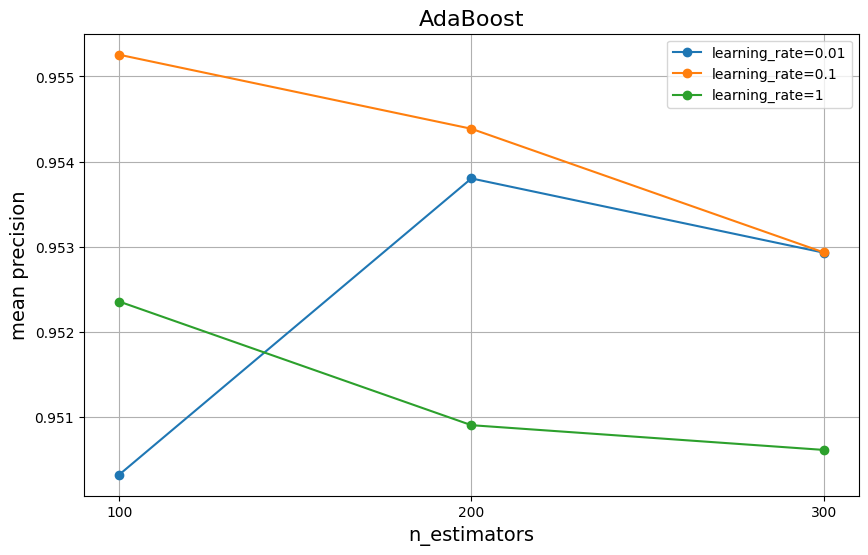

In [148]:
results_ada = ada_cv.cv_results_['mean_test_score']
n_estimators = [100, 200, 300]
learning_rates = [0.01, 0.1, 1]

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(n_estimators, results_ada[i * len(n_estimators):(i + 1) * len(n_estimators)], marker='o', label=f'learning_rate={lr}')

plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('mean precision', fontsize=14)
plt.title('AdaBoost', fontsize=16)
plt.grid(True)
plt.xticks(n_estimators) 
plt.legend()
plt.show()


In [164]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)
gb_cv = GridSearchCV(gb, param_grid=gb_params, cv=5, scoring='accuracy')
gb_cv.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting: {gb_cv.best_params_}")
y_pred_gb = gb_cv.best_estimator_.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb:.4f}")

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy of Gradient Boosting: 0.9431


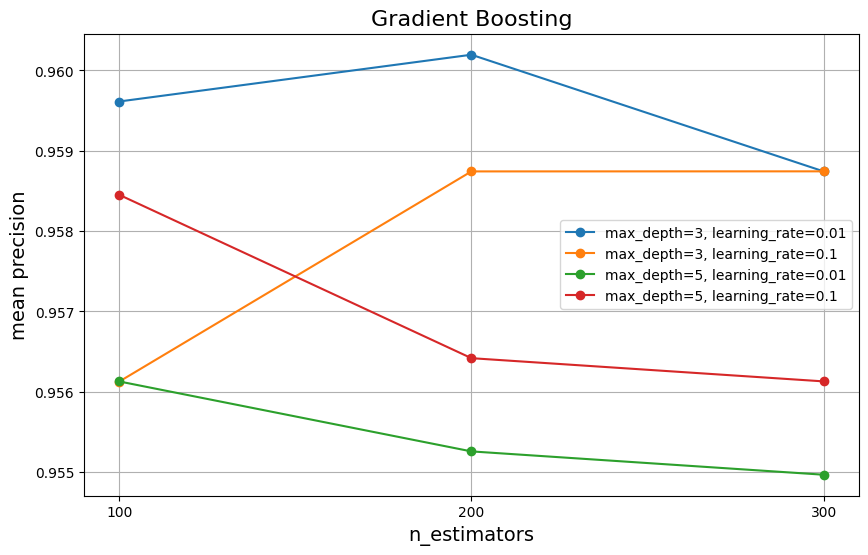

In [165]:
results_gb = gb_cv.cv_results_['mean_test_score']
n_estimators = [100, 200, 300]
max_depths = [3, 5]
learning_rates = [0.01, 0.1]

plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depths):
    for j, learning_rate in enumerate(learning_rates):
        index = i * len(learning_rates) * len(n_estimators) + j * len(n_estimators)
        plt.plot(n_estimators, results_gb[index:index + len(n_estimators)], marker='o', 
                 label=f'max_depth={max_depth}, learning_rate={learning_rate}')

plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('mean precision', fontsize=14)
plt.title('Gradient Boosting', fontsize=16)
plt.grid(True)
plt.xticks(n_estimators)
plt.legend()
plt.show()

In [171]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_m = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cv = GridSearchCV(xgb_m, param_grid=xgb_params, cv=3, scoring='accuracy')
xgb_cv.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_cv.best_params_}")

y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of Gradient XGBoost: {accuracy_xgb:.4f}")

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy of Gradient XGBoost: 0.9443


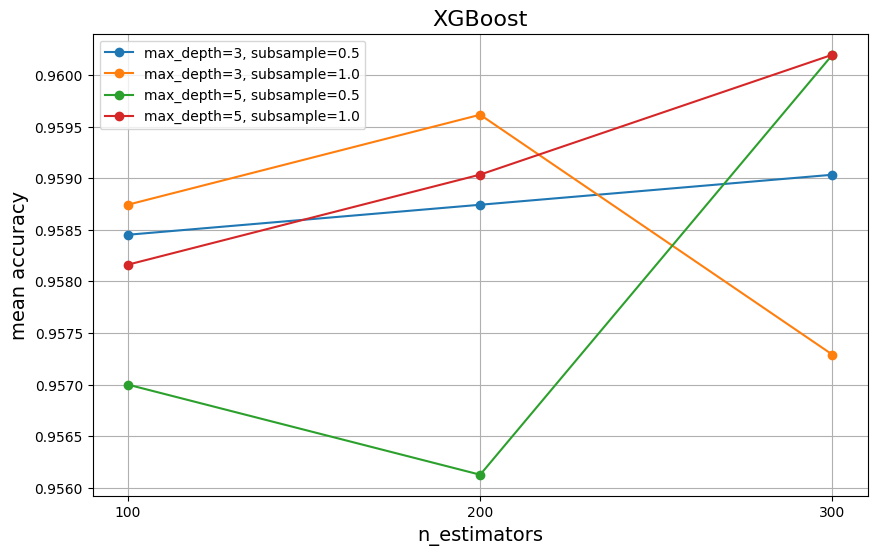

In [167]:
results_xgb = xgb_cv.cv_results_['mean_test_score']
n_estimators = [100, 200, 300]
max_depths = [3, 5]
subsamples = [0.8, 1.0]

plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depths):
    for j, subsample in enumerate(subsamples):
        index = (i * len(subsamples) + j) * len(n_estimators)
        plt.plot(n_estimators, results_xgb[index:index + len(n_estimators)], marker='o', 
                 label=f'max_depth={max_depth}, subsample={subsample}')

plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('mean accuracy', fontsize=14)  
plt.title('XGBoost', fontsize=16)
plt.grid(True)
plt.xticks(n_estimators) 
plt.legend()
plt.show()

In [169]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy

gb_no_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
print("Gradient Boosting with no regularization:")
accuracy_gb_no_reg = evaluate_model(gb_no_reg, X_train, y_train, X_test, y_test)

gb_with_reg = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42, 
    subsample=0.8,        
    min_samples_split=5,  
    min_samples_leaf=3    
)
print("Gradient Boosting with regularization:")
accuracy_gb_with_reg = evaluate_model(gb_with_reg, X_train, y_train, X_test, y_test)

xgb_no_reg = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, 
                               random_state=42, use_label_encoder=False, eval_metric='logloss')
print("XGBoost with no regularization:")
accuracy_xgb_no_reg = evaluate_model(xgb_no_reg, X_train, y_train, X_test, y_test)

xgb_with_reg = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    subsample=0.8,       
    alpha=0.01,           
    reg_lambda=0.1,       
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)
print("XGBoost with regularization:")
accuracy_xgb_with_reg = evaluate_model(xgb_with_reg, X_train, y_train, X_test, y_test)

print("\nComparison of Results:")
print(f"Gradient Boosting with no regularization: {accuracy_gb_no_reg:.4f}")
print(f"Gradient Boosting with regularization: {accuracy_gb_with_reg:.4f}")
print(f"XGBoost with no regularization: {accuracy_xgb_no_reg:.4f}")
print(f"XGBoost with regularization: {accuracy_xgb_with_reg:.4f}")

Gradient Boosting with no regularization:
Accuracy: 0.9431
Gradient Boosting with regularization:
Accuracy: 0.9454
XGBoost with no regularization:
Accuracy: 0.9443
XGBoost with regularization:
Accuracy: 0.9477

Comparison of Results:
Gradient Boosting with no regularization: 0.9431
Gradient Boosting with regularization: 0.9454
XGBoost with no regularization: 0.9443
XGBoost with regularization: 0.9477


Висновок:

1. Моделі без регулярізації:
   - AdaBoost і XGBoost показали однакову точність 0.9443, що свідчить про їхню здатність до класифікації в нашому випадку
   - Gradient Boosting трохи поступається з точністю 0.9431, що може вказувати на його меншу ефективність
2. Моделі з регулярізацією:
   - XGBoost має найвищу точність 0.9477, що підтверджує його ефективність
   - Gradient Boosting також покращив свою точність 0.9454 після регулярізації, але залишився меншим за XGBoost
3. Загальне:
   - Регуляризація значно підвищив точність моделей Gradient Boosting і XGBoost, що підтверджує її важливість у запобіганні перенавчанню та покращенні загальної продуктивності моделей
   - XGBoost виявився найефективнішою моделлю як з регулярізацією, так і без неї, що робить його кращим вибором для задачі класифікації в нашому випадку

На мою думку, для оптимізації результатів класифікації у задачах, що подібні до нашої, краще використовувати XGBoost з регулярізацією.